In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_ori = cv2.imread('./lenna.jpg', 1)
img_bgr = cv2.cvtColor(img_ori, cv2.COLOR_RGB2BGR)
img_gray = cv2.imread('./lenna.jpg', 0)
print(img_ori.shape)
print(img_gray.shape)

(500, 500, 3)
(500, 500)


In [3]:
cv2.imshow('lenna', img_ori)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

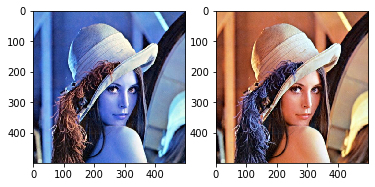

In [4]:
plt.subplot(121)
plt.imshow(img_ori)
plt.subplot(122)
plt.imshow(img_bgr)
plt.show()

In [5]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

In [6]:
def imgshow(img, size=(2,2)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    plt.show()

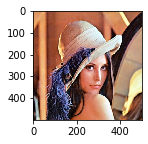

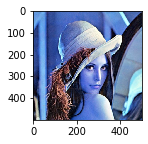

In [7]:
imgshow(img_ori)
imgshow(img_bgr)

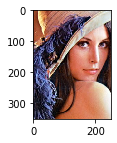

In [8]:
img_crop = img_ori[150:, 100:350]
imgshow(img_crop)

In [9]:
B,G,R = cv2.split(img_ori)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

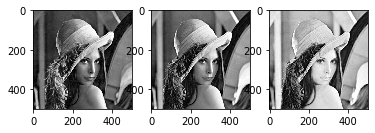

In [10]:
plt.subplot(131)
plt.imshow(B, cmap='gray')
plt.subplot(132)
plt.imshow(G, cmap='gray')
plt.subplot(133)
plt.imshow(R, cmap='gray')
plt.show()

In [11]:
def img_cooler(img, b_increase, r_decrease):
    B,G,R = cv2.split(img)
    b_lim = 255 - b_increase
    B[B > b_lim] = 255
    B[B <= b_lim] = (b_increase + B[B <= b_lim]).astype(img.dtype)
    r_lim = r_decrease
    R[R < r_lim] = 0
    R[R >= r_lim] = (R[R >= r_lim] - r_decrease).astype(img.dtype)
    return cv2.merge((B, G, R))

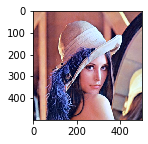

In [12]:
img_cooler = img_cooler(img_ori, 30, 10)
imgshow(img_cooler)

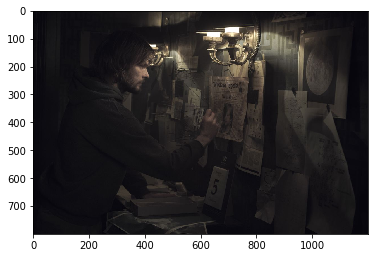

In [13]:
img_dark = cv2.imread('./dark.jpg')
imgshow(img_dark, size=(6,6))

In [14]:
def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0) ** invGamma) * 255)
    table = np.array(table).astype(np.uint8)
#     print(type(table))
#     print(table.shape)
    return cv2.LUT(img, table)

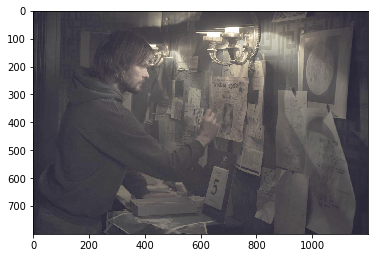

In [15]:
img_brighter = adjust_gamma(img_dark, 2)
imgshow(img_brighter, size=(6,6))

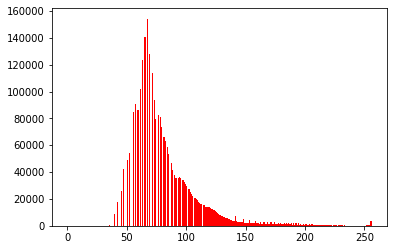

In [16]:
plt.hist(img_brighter.flatten(), 256, [0, 256], color='r')
plt.show()

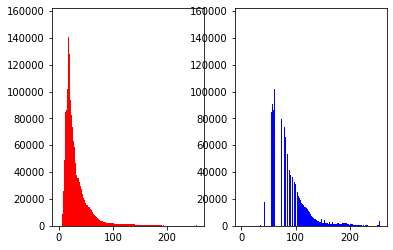

In [17]:
plt.subplot(121)
plt.hist(img_dark.flatten(), 256, [0, 256], color='r')
plt.subplot(122)
plt.hist(img_brighter.flatten(), 256, [0, 256], color='b')
plt.show()

In [18]:
img_yuv = cv2.cvtColor(img_brighter, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

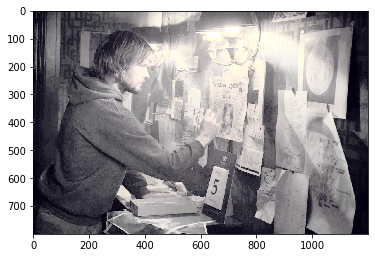

In [19]:
imgshow(img_output, size=(6,6))

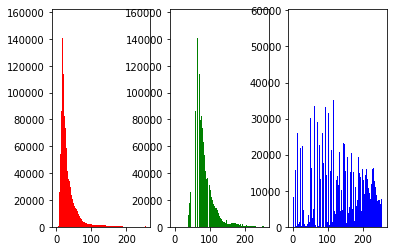

In [20]:
plt.subplot(131)
plt.hist(img_dark.flatten(), 256, [0, 256], color='r')
plt.subplot(132)
plt.hist(img_brighter.flatten(), 256, [0, 256], color='g')
plt.subplot(133)
plt.hist(img_output.flatten(), 256, [0, 256], color='b')
plt.show()

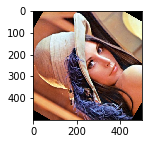

In [21]:
M = cv2.getRotationMatrix2D((img_ori.shape[0] / 2, img_ori.shape[1] / 2),  60, 1.2)
img_rot = cv2.warpAffine(img_ori, M, (img_ori.shape[1], img_ori.shape[0]))
imgshow(img_rot)

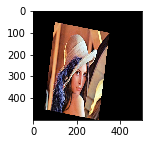

In [24]:
w, h, c = img_ori.shape
pts1 = np.float32([[0, 0], [h - 1, 0], [0, w - 1]])
pts2 = np.float32([[h * 0.2, w * 0.1], [h * 0.7, w * 0.2], [h * 0.1, w * 0.9]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_ori, M, (h, w))
imgshow(dst)

In [28]:
import random
def random_wrap(img, row, col):
    height, width, channels = img.shape
    
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)
    
    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)
    
    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    
    M = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(img, M, (width, height))
    
    return M, dst

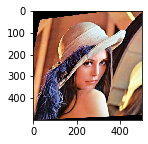

In [31]:
M_Wrap, img_Wrap = random_wrap(img_ori, img_ori.shape[0], img_ori.shape[1])
imgshow(img_Wrap)